<a href="https://colab.research.google.com/github/Sherif-toiema22/NTI-machine-learning-tasks-/blob/main/Building_logistic_regresion_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [2]:
def compute_loss(y, y_pred):
    m = len(y)
    loss = -1/m * (np.dot(y, np.log(y_pred)) + np.dot((1 - y), np.log(1 - y_pred)))
    return loss


In [3]:
def compute_gradients(X, y, y_pred):
    m = len(y)
    dw = 1/m * np.dot(X.T, (y_pred - y))
    db = 1/m * np.sum(y_pred - y)
    return dw, db

def gradient_descent(X, y, learning_rate, num_iterations):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    losses = []

    for i in range(num_iterations):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
        loss = compute_loss(y, y_pred)
        dw, db = compute_gradients(X, y, y_pred)

        w -= learning_rate * dw
        b -= learning_rate * db

        losses.append(loss)

        if i % 100 == 0:
            print(f'Iteration {i}, Loss: {loss}')

    return w, b, losses


In [4]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in y_pred]


Iteration 0, Loss: 0.6931471805599453
Iteration 100, Loss: 0.48320935899098855
Iteration 200, Loss: 0.4065060347929228
Iteration 300, Loss: 0.3666660923430565
Iteration 400, Loss: 0.34125050709842786
Iteration 500, Loss: 0.32304144134934204
Iteration 600, Loss: 0.30904327269554616
Iteration 700, Loss: 0.2977707013725296
Iteration 800, Loss: 0.288389013732355
Iteration 900, Loss: 0.28038513749304694


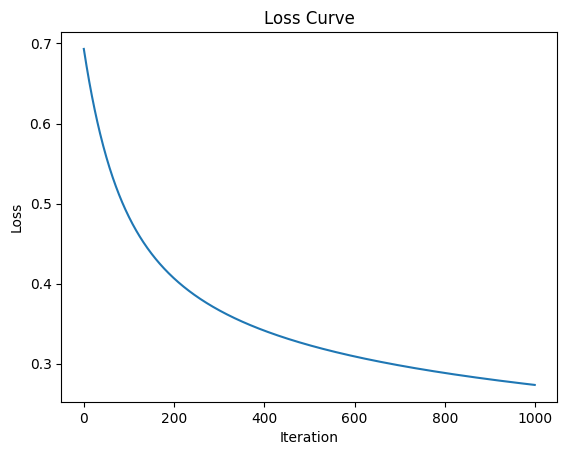

Accuracy: 0.87


In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset and prepare for binary classification (Iris-Virginica vs. others)
iris = load_iris()
X = iris.data
y = (iris.target == 2).astype(int)  # Binary classification: 1 if Iris-Virginica, else 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
learning_rate = 0.01
num_iterations = 1000
w, b, losses = gradient_descent(X_train, y_train, learning_rate, num_iterations)

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
